In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [9]:
import os

os.listdir()


['Descripcion.ipynb',
 'Descripcion copy.ipynb',
 'Limpieza.ipynb',
 '3. Visualizacion.ipynb',
 'codigo.ipynb']

In [14]:
df_cafe = pd.read_csv('/Users/maitanelopezsanchez/mi_proyecto-1/Datasets/dataset cafe limip')

In [50]:
df_cafe.sample(5)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
5396,TXN_3201783,Juice,3.0,3.0,9.0,Other,Not Saved,03/12/2023
864,TXN_5182042,Sandwich,4.0,4.0,16.0,Other,Takeaway,25/02/2023
459,TXN_7296560,Juice,2.0,3.0,6.0,Other,Not Saved,20/10/2023
4895,TXN_2175096,Tea,1.0,1.5,1.5,Other,In-store,25/02/2023
5218,TXN_4019047,Coffee,2.0,2.0,4.0,Other,Not Saved,14/09/2023


In [80]:
df_cafe.shape

(9331, 8)

<Axes: xlabel='Item', ylabel='count'>

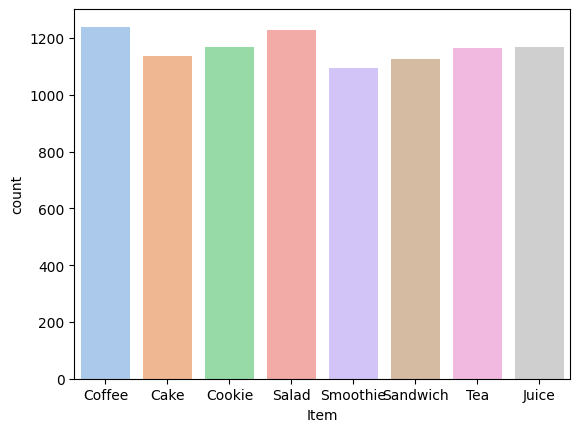

In [ ]:
sns.countplot(x=df_cafe.Item, palette="pastel")

Creando un gráfico de barras podemos observar como hay una venta bastante igualada entre todos los productos que se venden en la cafetería.

In [83]:
df_cafe.groupby('Item')['Total Spent'].mean()

Item
Cake         9.142355
Coffee       6.072581
Cookie       2.973482
Juice        9.002568
Salad       15.065041
Sandwich    12.170364
Smoothie    12.197441
Tea          4.539914
Name: Total Spent, dtype: float64

Aunque el número de unidades vendidas de cada producto de la cafetería es muy parecido la realidad es que los productos que más ingresos brutos han generado han sido las Ensaladas, los Sandwiches y los Smoothies y los que menos las galletas cookie y los tés. 

<Axes: ylabel='count'>

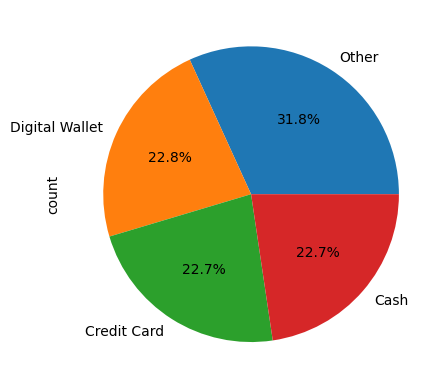

In [ ]:
df_cafe["Payment Method"].value_counts().plot.pie(autopct="%1.1f%%")

Podemos observar como el método de pago se divide en partes iguales entre Credit Card, Cash y Digital Wallet, aunque podemos afirmar que solo 1 de cada 3 clientes pagan con moneda física.

<Axes: xlabel='Location', ylabel='count'>

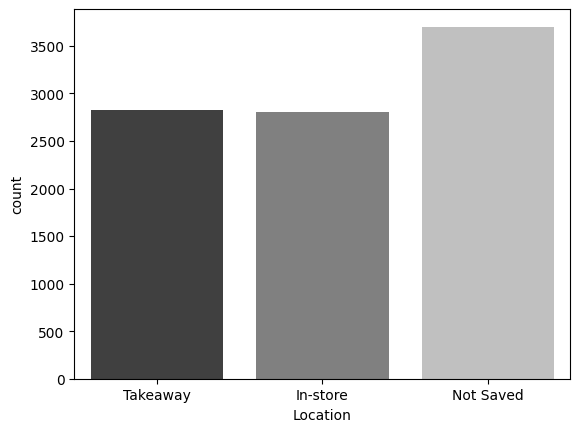

In [ ]:
sns.countplot(x=df_cafe.Location, palette="gray")

Lo mismo ocurre con el Location donde consumen los productos que están muy igualados entre consumir en la cafetería o comprar para llevar.

<Axes: xlabel='Location', ylabel='count'>

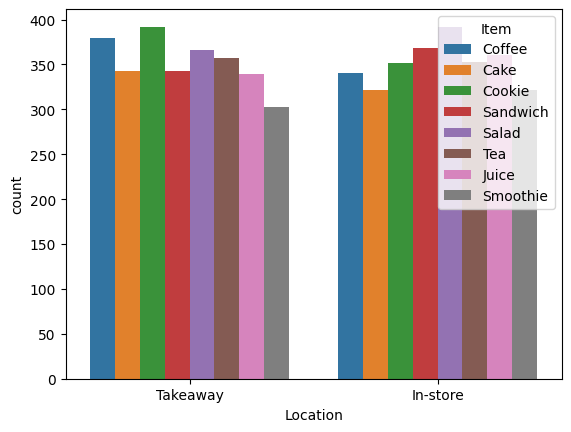

In [ ]:
df_filtrado = df_cafe[df_cafe["Location"] != "Not Saved"]
sns.countplot(data=df_filtrado, x="Location", hue="Item")


En esta gráfica podemos ver qué podructo se consume más en el local o más para take-away. Por ejemplo, el café y las cookies se compran más en formato Take-Away y los productos más elaborados como el Sandwich y la Ensalada se piden más para consumir en la cafetería.

In [ ]:
df_cafe.groupby('Item')['Quantity'].count()

Item
Cake        1138
Coffee      1240
Cookie      1169
Juice       1168
Salad       1230
Sandwich    1127
Smoothie    1094
Tea         1165
Name: Quantity, dtype: int64

<Axes: xlabel='Total Spent', ylabel='Count'>

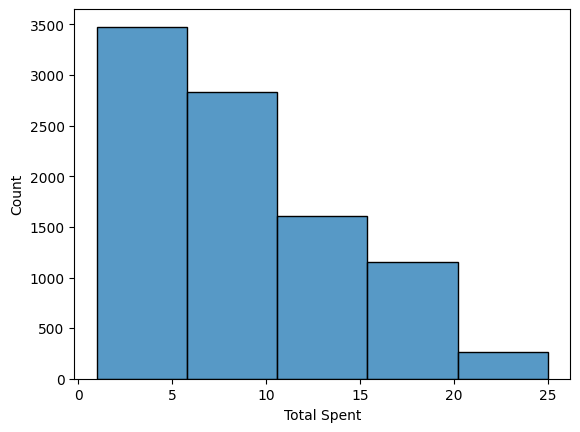

In [ ]:
sns.histplot(df_cafe["Total Spent"], bins=5)



Como era de esperar en una cafetería, el rango de gasto más alto es el de 1-6€ y ninguna compra ha superado los 25€ en el año 2023

<Axes: xlabel='Month', ylabel='Total Spent'>

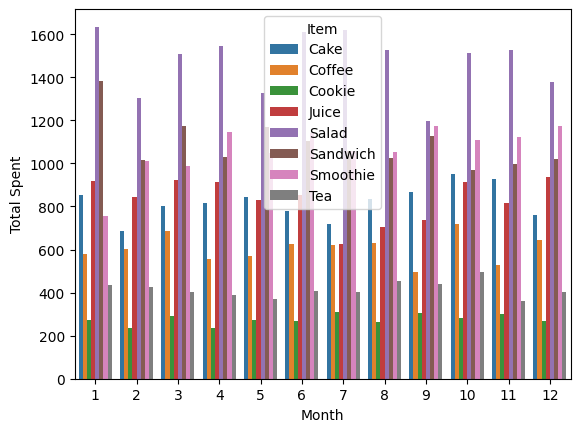

In [ ]:
df_fecha = df_cafe[df_cafe["Transaction Date"] != "Not Time"].copy()
df_fecha["Transaction Date"] = pd.to_datetime(df_fecha["Transaction Date"], format="%d/%m/%Y")
df_fecha["Month"] = df_fecha["Transaction Date"].dt.month

sns.barplot(data=df_fecha.groupby(["Month","Item"])["Total Spent"].sum().reset_index(), 
            x="Month", y="Total Spent", hue="Item")

Observando la anterior gráfica y bajo el punto de vista de un Data Scientist no es la mejor forma de representar la información ya que es bastante difícil de leer. Igualmente vemos que la dispersión entre meses por cada producto es muy pequeña y que no se ve ninguna evolución en función del tiempo.

In [ ]:
df_cafe["Transaction Date"].value_counts()


Transaction Date
Not Time      429
13/03/2023     39
24/07/2023     39
21/07/2023     37
21/09/2023     36
             ... 
23/02/2023     14
27/04/2023     14
22/07/2023     13
22/04/2023     13
24/09/2023     13
Name: count, Length: 366, dtype: int64

de 9.331 filas solo 429 tienen valores faltantes de tiempo, pero viendo la proporción de los productos por mes, vemos que esta falta no afecta al resultado final.

In [ ]:
df_cafe["Location"].value_counts()

Location
Not Saved    3701
Takeaway     2822
In-store     2808
Name: count, dtype: int64

En este caso, los valores nulos o erroneos eran 1/3 de la información total sobre la Location, por ello no se han eliminado. Al ver los resultados finales, dan resultados proporcionados.